<a href="https://colab.research.google.com/github/eroali/DeepLearning/blob/main/DL_Module_2_File_3_(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Module 2 File 3 (Assignment)

ipynb file 3: Create a Notebook File and perform the following tasks

Marks: 25

As a part of this assignment, you will be performing the following tasks:

• Prepare a detailed python notebook (similar to this one) using multilayer perceptron for
classifying the images from MNIST Fashion Dataset with the best accuracy


• Prepare the dataset for the model


• Develop a Single Layer Perceptron model for classifying the handwritten digits


• Plot the change in accuracy per epochs


• Evaluate the model on the testing data


• Analyze the model summary


• Add a hidden layer to the model to make it Multilayer Perceptron


• Add Dropout to prevent overfitting and check its effect on accuracy


• Increase the number of hidden layer neuron and check its accuracy


• Use different optimizers and check its effect on accuracy


• Increase the hidden layers and check its effect on accuracy


• Manipulate the batch_size and epochs and check its effect on accuracy


Answer: What parameters should be chosen to classify the images into various categories?

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns



In [ ]:
tf.__version__

'2.4.0'

In [ ]:
keras.__version__

'2.4.0'

In [ ]:
# Loading MNIST fashion dataset

(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[0].shape

(28, 28)

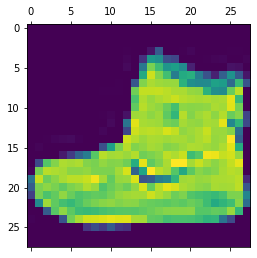

In [ ]:
plt.matshow(X_train[0])

In [ ]:
#X_train[0]

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train[0]

9

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Preparing dataset

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Ankle boot'

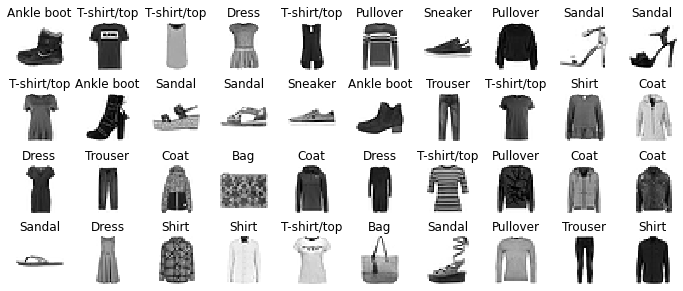

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# scaling
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

## Single Layer Perceptron

In [ ]:
# build model
model_0 = keras.models.Sequential()

# flatten each input image  to a vector of 784 numbers
model_0.add(keras.layers.Flatten(input_shape=(28, 28)))

# Add an output layer with 10 output units (10 different classes):
model_0.add(Dense(10, name='dense_layer', activation = 'softmax'))

model_0.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_0.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#training = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

training = model_0.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 2850.7232 - accuracy: 0.6764 - val_loss: 1818.1895 - val_accuracy: 0.7971
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1627.5075 - accuracy: 0.7755 - val_loss: 1316.6865 - val_accuracy: 0.7951
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1610.6124 - accuracy: 0.7807 - val_loss: 1912.2035 - val_accuracy: 0.7930
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1495.9266 - accuracy: 0.7913 - val_loss: 1065.7134 - val_accuracy: 0.8236
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1469.5064 - accuracy: 0.7922 - val_loss: 2009.1561 - val_accuracy: 0.7341
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1531.9609 - accuracy: 0.7923 - val_loss: 1845.1049 - val_accuracy: 0.7538
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1449.1925 - accuracy: 0.

In [ ]:
#training.history
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


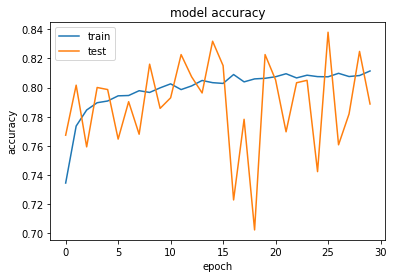

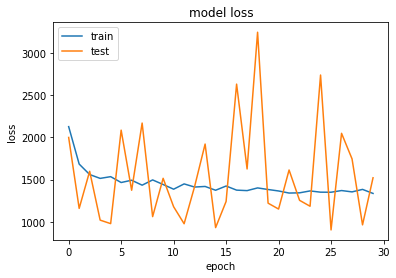

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8381

Test Loss 0.46069785952568054

Test accuracy: 0.838100016117096


In [ ]:
training.params

{'epochs': 30, 'steps': 1500, 'verbose': 1}

In [ ]:
print(training.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plot the change in accuracy per epoch

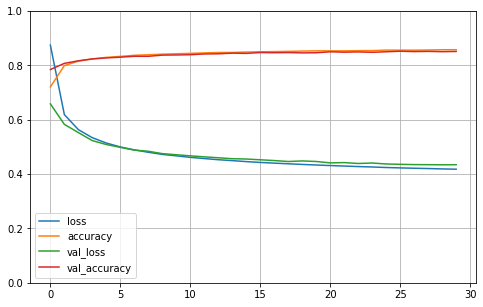

In [ ]:
import pandas as pd

pd.DataFrame(training.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model on the testing data

In [ ]:
# Evaluate the model on the testing data

test_loss, test_acc = model_0.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8381

Test Loss 0.46069785952568054

Test accuracy: 0.838100016117096


## Analyze the model summary

In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#type(model_0.summary())

In [ ]:
layer = model_0.layers[1]
layer.name

'dense_layer'

In [ ]:
weights = layer.get_weights()
weights

[array([[ 0.04588224,  0.06939685, -0.02545498, ..., -0.0688276 ,
          0.04275149, -0.00788797],
        [ 0.02745555, -0.04658176, -0.05476241, ...,  0.06284777,
         -0.07374067, -0.01481592],
        [-0.02667236, -0.02973852,  0.02806202, ..., -0.0344272 ,
          0.06810909, -0.04451703],
        ...,
        [-0.03677174,  0.06777908,  0.07339843, ..., -0.0090995 ,
         -0.11194814,  0.02819857],
        [-0.02278089, -0.03884117,  0.03403194, ..., -0.07376315,
         -0.0183305 ,  0.03232064],
        [ 0.07148348, -0.08507141,  0.08198615, ...,  0.02527218,
          0.02166004,  0.01142536]], dtype=float32),
 array([ 0.45460632, -0.49237034, -0.09762325,  0.35314575, -1.2711831 ,
         2.4109743 ,  0.5111236 , -0.04825496, -0.52362037, -1.2967978 ],
       dtype=float32)]

## Add a hidden layer to the model to make it Multilayer Perceptron

In [ ]:
# build model
model_1 = keras.models.Sequential()

# flatten each input image  to a vector of 784 numbers
model_1.add(keras.layers.Flatten(input_shape=(28, 28)))

# Adding a dense layer to make it multilayer Perceptron
model_1.add(Dense(300, name='dense_layer_1', activation='relu'))
#model.add(Dropout(0.30))

# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_5', activation = 'softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 300)               235500    
_________________________________________________________________
dense_layer_5 (Dense)        (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model

model_1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train model

training = model_1.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0301 - accuracy: 0.6753 - val_loss: 0.5591 - val_accuracy: 0.8112
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5377 - accuracy: 0.8203 - val_loss: 0.4994 - val_accuracy: 0.8270
Epoch 3/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4831 - accuracy: 0.8362 - val_loss: 0.4668 - val_accuracy: 0.8352
Epoch 4/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4530 - accuracy: 0.8434 - val_loss: 0.4383 - val_accuracy: 0.8462
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4346 - accuracy: 0.8486 - val_loss: 0.4406 - val_accuracy: 0.8472
Epoch 6/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4205 - accuracy: 0.8557 - val_loss: 0.4223 - val_accuracy: 0.8522
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4032 - accuracy: 0.8616 - val_loss: 0.4065 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


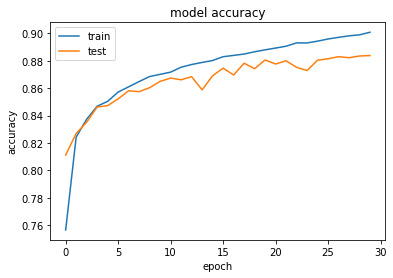

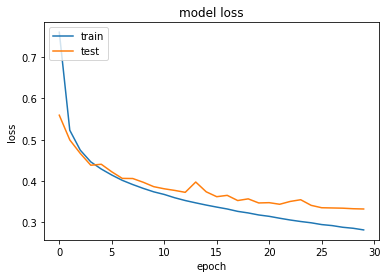

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8737

Test Loss 0.355976939201355

Test accuracy: 0.8737000226974487


In [ ]:
training.params

{'epochs': 30, 'steps': 1500, 'verbose': 1}

In [ ]:
print(training.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plot the change in accuracy per epoch

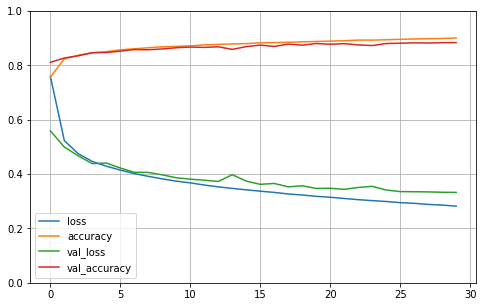

In [ ]:
import pandas as pd

pd.DataFrame(training.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model on the testing data

In [ ]:
# Evaluate the model on the testing data

test_loss, test_acc = model_1.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8737

Test Loss 0.355976939201355

Test accuracy: 0.8737000226974487


## Analyze the model summary

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 300)               235500    
_________________________________________________________________
dense_layer_5 (Dense)        (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
layer1 = model_1.layers[1]
layer1.name

'dense_layer_1'

In [ ]:
weights1 = layer1.get_weights()
weights1

[array([[-0.06100519, -0.0268347 ,  0.00661279, ..., -0.06044499,
          0.028899  ,  0.05418257],
        [-0.04590829,  0.00356038, -0.00788125, ..., -0.07412995,
          0.03484922,  0.0144207 ],
        [-0.00453135,  0.00269585,  0.00794113, ...,  0.03098748,
          0.02633523, -0.05424954],
        ...,
        [-0.04834627,  0.07081134, -0.0706983 , ...,  0.06329881,
         -0.0730135 , -0.01440673],
        [ 0.02318721,  0.00924032,  0.023852  , ...,  0.02673823,
         -0.01747489,  0.02137295],
        [-0.05527546, -0.05958702, -0.02158223, ...,  0.04753517,
         -0.01673931,  0.05678657]], dtype=float32),
 array([ 1.20785385e-02,  6.23119175e-02,  3.41126993e-02,  1.21524513e-01,
         7.08179548e-02,  2.53164303e-03, -2.90349312e-02,  5.70759214e-02,
         1.13589682e-01,  2.82680858e-02,  4.24956717e-02, -2.01398395e-02,
         9.84292030e-02, -1.58113047e-01,  1.57490566e-01,  1.47414491e-01,
         1.42477497e-01, -2.02160254e-02,  1.07879058e

In [ ]:
layer2 = model_1.layers[2]
layer2.name

'dense_layer_5'

In [ ]:
weights2 = layer2.get_weights()
weights2

[array([[-0.09179432,  0.04954231, -0.14512162, ...,  0.11764135,
         -0.10886224,  0.07510721],
        [-0.16803612, -0.26491556,  0.04253254, ...,  0.05848765,
          0.18905997, -0.02370564],
        [-0.10187153, -0.10097929, -0.02026241, ..., -0.19039573,
          0.19559549, -0.12193947],
        ...,
        [ 0.4472459 ,  0.04101318,  0.00903666, ...,  0.01042178,
         -0.11618613, -0.11411677],
        [ 0.21780956,  0.15453558,  0.01472483, ..., -0.08920632,
         -0.25876576,  0.2872336 ],
        [ 0.09292348, -0.02603474, -0.03355931, ...,  0.05074228,
         -0.04686321, -0.16992916]], dtype=float32),
 array([ 0.0924186 , -0.19451821,  0.06505683,  0.16916765, -0.3253029 ,
         0.45640972,  0.14309186,  0.1348854 , -0.19377765, -0.34743178],
       dtype=float32)]

model_1

Test Loss 0.3609267473220825

Test accuracy: 0.8705000281333923

## Add Dropout to prevent overfitting and check its effect on accuracy

In [ ]:
from tensorflow.keras.layers import Dropout

# build model
model_2 = keras.models.Sequential()

# flatten each input image  to a vector of 784 numbers
model_2.add(keras.layers.Flatten(input_shape=(28, 28)))

# Adding a dense layer to make it multilayer Perceptron
model_2.add(Dense(300, name='dense_layer_1', activation='relu'))
model_2.add(Dropout(0.30))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_5', activation = 'softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_layer_5 (Dense)        (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model

model_2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train model

training = model_2.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0880 - accuracy: 0.6434 - val_loss: 0.5752 - val_accuracy: 0.8092
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5947 - accuracy: 0.8033 - val_loss: 0.5053 - val_accuracy: 0.8283
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5137 - accuracy: 0.8272 - val_loss: 0.4719 - val_accuracy: 0.8367
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4905 - accuracy: 0.8323 - val_loss: 0.4507 - val_accuracy: 0.8432
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4586 - accuracy: 0.8432 - val_loss: 0.4418 - val_accuracy: 0.8448
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4389 - accuracy: 0.8498 - val_loss: 0.4193 - val_accuracy: 0.8515
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4320 - accuracy: 0.8477 - val_loss: 0.4038 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


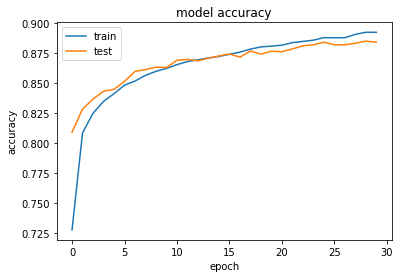

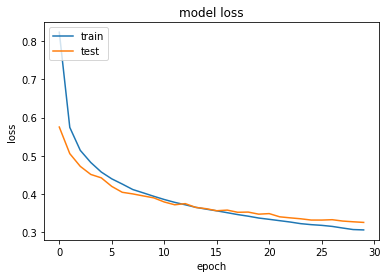

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

#evaluate the model

test_loss, test_acc = model_2.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8758

Test Loss 0.34937459230422974

Test accuracy: 0.8758000135421753


model_1

Test Loss 0.3609267473220825

Test accuracy: 0.8705000281333923

model_1

Test Loss 0.3609267473220825

Test accuracy: 0.8705000281333923

model_2 (with Dropout=30%)

Test Loss 0.351416677236557

Test accuracy: 0.8777999877929688

### Not much improvement in accuracy

## ***** Increase the number of hidden layer neurons and check its accuracy

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns



# build model
model_3 = keras.models.Sequential()

# flatten each input image  to a vector of 784 numbers
model_3.add(keras.layers.Flatten(input_shape=(28, 28)))

# Adding a dense layer to make it multilayer Perceptron
model_3.add(Dense(512, name='dense_layer_1', activation='relu')) #<<<<<<<<<<<<<<<<<<<
model_3.add(Dropout(0.30))


# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_5', activation = 'softmax'))

print(model_3.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_5 (Dense)        (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# compile model

model_3.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train model

training = model_3.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 4873.4790 - accuracy: 0.1234 - val_loss: 2.2790 - val_accuracy: 0.1103
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2650 - accuracy: 0.1293 - val_loss: 2.1699 - val_accuracy: 0.1592
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2181 - accuracy: 0.1405 - val_loss: 2.2384 - val_accuracy: 0.1252
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2510 - accuracy: 0.1266 - val_loss: 2.1874 - val_accuracy: 0.1485
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2167 - accuracy: 0.1431 - val_loss: 2.1574 - val_accuracy: 0.1545
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2067 - accuracy: 0.1444 - val_loss: 2.2312 - val_accuracy: 0.1268
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2351 - accuracy: 0.1339 - val_loss: 2.1667 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


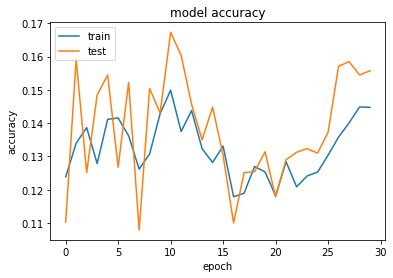

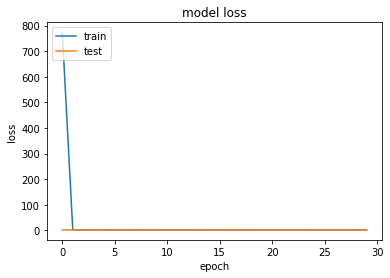

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model

test_loss, test_acc = model_3.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 3.4700 - accuracy: 0.1544

Test Loss 3.469975471496582

Test accuracy: 0.15440000593662262


############################################################

* model_3 (with Dropout=30% & more neurons in hidden layer)

    Test Loss 0.3466123044490814
    
    Test accuracy: 0.8776000142097473
    
############################################################
* model_2 (with Dropout=30%)

    Test Loss 0.351416677236557
    
    Test accuracy: 0.8777999877929688
    
############################################################
* model_1

    Test Loss 0.3609267473220825
    
    Test accuracy: 0.8705000281333923


## Use different optimizers and check its effect on accuracy

In [ ]:
from tensorflow.keras.layers import Dropout

# build model
model_4 = keras.models.Sequential()

# flatten each input image  to a vector of 784 numbers
model_4.add(keras.layers.Flatten(input_shape=(28, 28)))

# Adding a dense layer to make it multilayer Perceptron
model_4.add(Dense(300, name='dense_layer_1', activation='relu')) #<<<<<<<<<<<<<<<<<<<
model_4.add(Dropout(0.30))


# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_5', activation = 'softmax'))

print(model_4.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 300)               235500    
_________________________________________________________________
dropout_11 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_layer_5 (Dense)        (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
None


## SGD optimizer

In [ ]:
# compile model SGD

model_4.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train model sgd
training = model_4.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.8917 - val_loss: 0.3281 - val_accuracy: 0.8835
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2998 - accuracy: 0.8938 - val_loss: 0.3245 - val_accuracy: 0.8853
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2951 - accuracy: 0.8956 - val_loss: 0.3253 - val_accuracy: 0.8846
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2971 - accuracy: 0.8945 - val_loss: 0.3238 - val_accuracy: 0.8849
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2930 - accuracy: 0.8954 - val_loss: 0.3205 - val_accuracy: 0.8874
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2902 - accuracy: 0.8977 - val_loss: 0.3203 - val_accuracy: 0.8848
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2893 - accuracy: 0.8966 - val_loss: 0.3185 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


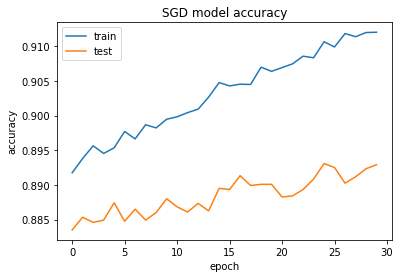

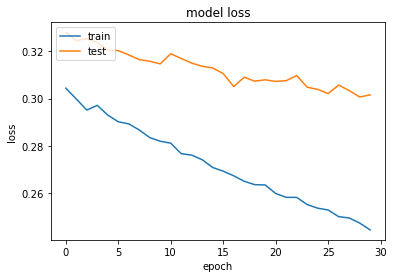

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('SGD model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model

test_loss, test_acc = model_4.evaluate(X_test, y_test)
print()
print('SGD Test Loss', test_loss)
print()
print('SGD Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8839

SGD Test Loss 0.3217797577381134

SGD Test accuracy: 0.883899986743927


## adam optimizer

In [ ]:
# compile model adam
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train model adam
training = model_4.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4002 - accuracy: 0.8516 - val_loss: 0.3565 - val_accuracy: 0.8712
Epoch 2/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3706 - accuracy: 0.8622 - val_loss: 0.3546 - val_accuracy: 0.8717
Epoch 3/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3566 - accuracy: 0.8683 - val_loss: 0.3533 - val_accuracy: 0.8748
Epoch 4/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3393 - accuracy: 0.8749 - val_loss: 0.3572 - val_accuracy: 0.8702
Epoch 5/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3290 - accuracy: 0.8789 - val_loss: 0.3477 - val_accuracy: 0.8757
Epoch 6/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3175 - accuracy: 0.8828 - val_loss: 0.3262 - val_accuracy: 0.8821
Epoch 7/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3094 - accuracy: 0.8841 - val_loss: 0.3294 - val_accuracy:

In [ ]:
#evaluate the model

test_loss, test_acc = model_4.evaluate(X_test, y_test)
print()
print('adam Test Loss', test_loss)
print()
print('adam Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8902

adam Test Loss 0.35573434829711914

adam Test accuracy: 0.8902000188827515


## Increase the hidden layers and check its effect on accuracy

In [ ]:
from tensorflow.keras.layers import Dropout

# build model
model_5 = keras.models.Sequential()

# flatten each input image  to a vector of 784 numbers
model_5.add(keras.layers.Flatten(input_shape=(28, 28)))

# Adding a dense layer to make it multilayer Perceptron
model_5.add(Dense(300, name='dense_layer_1', activation='relu')) #<<<<<<<<<<<<<<<<<<<
model_5.add(Dropout(0.30))

# Adding another dense layer 
model_5.add(Dense(100, name='dense_layer_2', activation='relu')) #<<<<<<<<<<<<<<<<<<<
model_5.add(Dropout(0.30))

# Adding another dense layer 
model_5.add(Dense(50, name='dense_layer_3', activation='relu')) #<<<<<<<<<<<<<<<<<<<
model_5.add(Dropout(0.30))

# Adding another dense layer 
model_5.add(Dense(25, name='dense_layer_4', activation='relu')) #<<<<<<<<<<<<<<<<<<<
model_5.add(Dropout(0.30))

# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_5', activation = 'softmax'))

print(model_5.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 300)               235500    
_________________________________________________________________
dropout_15 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 100)               30100     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 50)                5050      
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)              

In [ ]:
# compile model SGD chosen

model_5.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train model adam
training = model_5.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4681 - accuracy: 0.4473 - val_loss: 0.7799 - val_accuracy: 0.7229
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9348 - accuracy: 0.6517 - val_loss: 0.6327 - val_accuracy: 0.7721
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7936 - accuracy: 0.7109 - val_loss: 0.5612 - val_accuracy: 0.7849
Epoch 4/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7137 - accuracy: 0.7438 - val_loss: 0.5139 - val_accuracy: 0.7999
Epoch 5/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.6573 - accuracy: 0.7673 - val_loss: 0.4897 - val_accuracy: 0.8172
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6221 - accuracy: 0.7850 - val_loss: 0.4716 - val_accuracy: 0.8317
Epoch 7/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5883 - accuracy: 0.7969 - val_loss: 0.4483 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


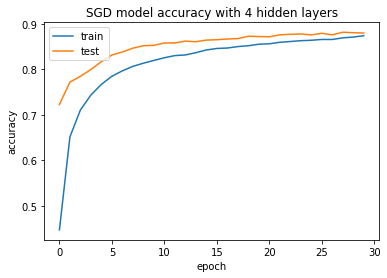

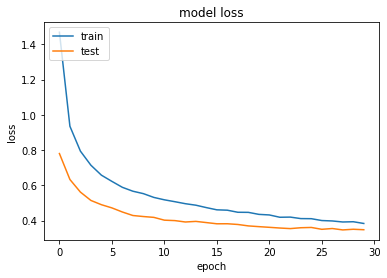

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('SGD model accuracy with 4 hidden layers')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model

test_loss, test_acc = model_5.evaluate(X_test, y_test)
print()
print('SGD Test Loss with 4 hidden layers:', test_loss)
print()
print('SGD Test accuracy with 4 hidden layers:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8719

SGD Test Loss with 4 hidden layers: 0.36970242857933044

SGD Test accuracy with 4 hidden layers: 0.8719000220298767


## Manipulate the batch_size and epochs and check its effect on accuracy

it is often advised that one starts at a small batch size, reaping the benefits of faster training dynamics,

and steadily grows the batch size through training, also reaping the benefits of guaranteed convergence.

In [ ]:
# compile model SGD chosen

model_5.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train model adam
training = model_5.fit(X_train, y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3680 - accuracy: 0.8786 - val_loss: 0.3438 - val_accuracy: 0.8843
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8799 - val_loss: 0.3416 - val_accuracy: 0.8832
Epoch 3/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3636 - accuracy: 0.8800 - val_loss: 0.3390 - val_accuracy: 0.8858
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8814 - val_loss: 0.3368 - val_accuracy: 0.8841
Epoch 5/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3538 - accuracy: 0.8820 - val_loss: 0.3381 - val_accuracy: 0.8873
Epoch 6/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3503 - accuracy: 0.8829 - val_loss: 0.3422 - val_accuracy: 0.8848
Epoch 7/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8848 - val_loss: 0.3394 - val_accuracy: 0.8849
Epoch 

In [ ]:
#evaluate the model

test_loss, test_acc = model_5.evaluate(X_test, y_test)
print()
print('SGD Test Loss batchsize = 64, epochs = 30:', test_loss)
print()
print('SGD Test accuracy batchsize = 64, epochs = 30::', test_acc)

313/313 [==============================] - 0s 988us/step - loss: 0.3633 - accuracy: 0.8810

SGD Test Loss batchsize = 64, epochs = 30: 0.3632567524909973

SGD Test accuracy batchsize = 64, epochs = 30:: 0.8809999823570251


In [ ]:

#train model adam
training = model_5.fit(X_train, y_train, batch_size = 128, epochs=30, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2974 - accuracy: 0.9002 - val_loss: 0.3359 - val_accuracy: 0.8887
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2950 - accuracy: 0.9011 - val_loss: 0.3377 - val_accuracy: 0.8913
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2961 - accuracy: 0.9032 - val_loss: 0.3391 - val_accuracy: 0.8902
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2957 - accuracy: 0.9016 - val_loss: 0.3364 - val_accuracy: 0.8922
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2924 - accuracy: 0.9034 - val_loss: 0.3317 - val_accuracy: 0.8921
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2911 - accuracy: 0.9041 - val_loss: 0.3370 - val_accuracy: 0.8934
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2894 - accuracy: 0.9040 - val_loss: 0.3343 - val_accuracy: 0.8930
Epoch 

In [ ]:
#evaluate the model

test_loss, test_acc = model_5.evaluate(X_test, y_test)
print()
print('SGD Test Loss batchsize = 128, epochs = 30:', test_loss)
print()
print('SGD Test accuracy batchsize = 128, epochs = 30::', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8825

SGD Test Loss batchsize = 128, epochs = 30: 0.36216363310813904

SGD Test accuracy batchsize = 128, epochs = 30:: 0.8824999928474426


In [ ]:
#train model adam
training = model_5.fit(X_train, y_train, batch_size = 256, epochs=30, validation_split=0.2)

Epoch 1/30
188/188 [==============================] - 1s 6ms/step - loss: 0.2636 - accuracy: 0.9120 - val_loss: 0.3435 - val_accuracy: 0.8947
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.2632 - accuracy: 0.9127 - val_loss: 0.3400 - val_accuracy: 0.8938
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.2674 - accuracy: 0.9113 - val_loss: 0.3387 - val_accuracy: 0.8937
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.2609 - accuracy: 0.9137 - val_loss: 0.3385 - val_accuracy: 0.8953
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.2624 - accuracy: 0.9131 - val_loss: 0.3372 - val_accuracy: 0.8957
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.2601 - accuracy: 0.9136 - val_loss: 0.3386 - val_accuracy: 0.8944
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.2610 - accuracy: 0.9140 - val_loss: 0.3399 - val_accuracy: 0.8942
Epoch 

In [ ]:
#evaluate the model

test_loss, test_acc = model_5.evaluate(X_test, y_test)
print()
print('SGD Test Loss batchsize = 256, epochs = 30:', test_loss)
print()
print('SGD Test accuracy batchsize = 256, epochs = 30::', test_acc)

313/313 [==============================] - 0s 994us/step - loss: 0.3638 - accuracy: 0.8866

SGD Test Loss batchsize = 256, epochs = 30: 0.3638027012348175

SGD Test accuracy batchsize = 256, epochs = 30:: 0.8866000175476074


In [ ]:
#train model adam
training = model_5.fit(X_train, y_train, batch_size = 64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2750 - accuracy: 0.9078 - val_loss: 0.3436 - val_accuracy: 0.8930
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2723 - accuracy: 0.9078 - val_loss: 0.3516 - val_accuracy: 0.8907
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2763 - accuracy: 0.9057 - val_loss: 0.3380 - val_accuracy: 0.8930
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2731 - accuracy: 0.9089 - val_loss: 0.3507 - val_accuracy: 0.8894
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2742 - accuracy: 0.9093 - val_loss: 0.3341 - val_accuracy: 0.8938
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2696 - accuracy: 0.9103 - val_loss: 0.3423 - val_accuracy: 0.8931
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.2713 - accuracy: 0.9093 - val_loss: 0.3412 - val_accuracy: 0.8919
Epoch 

In [ ]:
#evaluate the model

test_loss, test_acc = model_5.evaluate(X_test, y_test)
print()
print('SGD Test Loss batchsize = 64, epochs = 50:', test_loss)
print()
print('SGD Test accuracy batchsize = 64, epochs = 50::', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8904

SGD Test Loss batchsize = 64, epochs = 50: 0.3649570941925049

SGD Test accuracy batchsize = 64, epochs = 50:: 0.8903999924659729


## What parameters should be chosen to classify the images into various categories?

* Sequential


* 2 hidden layers - neurons: 300, 100 respectively


* Dropout = 30%


* network: Dense

    
* batchsize = 64


* epochs = 30


* optimizer: either sgd or adam


* expected test accuracy: 0.8689000010490417 (sgd) - 0.8828999996185303 (adam)


* best optimizer: adam


In [ ]:
from tensorflow.keras.layers import Dropout

# build model
model_6 = keras.models.Sequential()

# flatten each input image  to a vector of 784 numbers
model_6.add(keras.layers.Flatten(input_shape=(28, 28)))

# Adding a dense layer to make it multilayer Perceptron
model_6.add(Dense(300, name='dense_layer_1', activation='relu')) #<<<<<<<<<<<<<<<<<<<
model_6.add(Dropout(0.30))

# Adding another dense layer 
model_6.add(Dense(100, name='dense_layer_2', activation='relu')) #<<<<<<<<<<<<<<<<<<<
model_6.add(Dropout(0.30))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_5', activation = 'softmax'))

print(model_6.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 300)               235500    
_________________________________________________________________
dropout_21 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 100)               30100     
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_layer_5 (Dense)        (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_______________________________________________

In [ ]:
# compile model 

model_6.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train model 
training = model_6.fit(X_train, y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 1.1660 - accuracy: 0.5932 - val_loss: 0.6948 - val_accuracy: 0.7516
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 0.7423 - accuracy: 0.7403 - val_loss: 0.5771 - val_accuracy: 0.7991
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 0.6411 - accuracy: 0.7786 - val_loss: 0.5240 - val_accuracy: 0.8162
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.5843 - accuracy: 0.7987 - val_loss: 0.4905 - val_accuracy: 0.8257
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.8090 - val_loss: 0.4669 - val_accuracy: 0.8333
Epoch 6/30
750/750 [==============================] - 1s 2ms/step - loss: 0.5230 - accuracy: 0.8180 - val_loss: 0.4486 - val_accuracy: 0.8382
Epoch 7/30
750/750 [==============================] - 1s 2ms/step - loss: 0.5005 - accuracy: 0.8245 - val_loss: 0.4385 - val_accuracy: 0.8412
Epoch 

In [ ]:
#evaluate the model

test_loss, test_acc = model_6.evaluate(X_test, y_test)
print()
print('SGD Test Loss batchsize = 64, epochs = 30:', test_loss)
print()
print('SGD Test accuracy batchsize = 64, epochs = 30::', test_acc)

313/313 [==============================] - 0s 970us/step - loss: 0.3632 - accuracy: 0.8689

Test Loss batchsize = 64, epochs = 30: 0.36317700147628784

Test accuracy batchsize = 64, epochs = 30:: 0.8689000010490417


In [ ]:
# compile model 

model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train model 
training = model_6.fit(X_train, y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 0.4472 - accuracy: 0.8388 - val_loss: 0.3769 - val_accuracy: 0.8643
Epoch 2/30
750/750 [==============================] - 2s 2ms/step - loss: 0.4035 - accuracy: 0.8526 - val_loss: 0.3540 - val_accuracy: 0.8710
Epoch 3/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3788 - accuracy: 0.8616 - val_loss: 0.3512 - val_accuracy: 0.8734
Epoch 4/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3654 - accuracy: 0.8656 - val_loss: 0.3376 - val_accuracy: 0.8778
Epoch 5/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3544 - accuracy: 0.8709 - val_loss: 0.3308 - val_accuracy: 0.8809
Epoch 6/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3399 - accuracy: 0.8740 - val_loss: 0.3493 - val_accuracy: 0.8711
Epoch 7/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3322 - accuracy: 0.8780 - val_loss: 0.3422 - val_accuracy: 0.8756
Epoch 

In [ ]:
#evaluate the model

test_loss, test_acc = model_6.evaluate(X_test, y_test)
print()
print('SGD Test Loss batchsize = 64, epochs = 30:', test_loss)
print()
print('SGD Test accuracy batchsize = 64, epochs = 30::', test_acc)

313/313 [==============================] - 0s 972us/step - loss: 0.3449 - accuracy: 0.8829

SGD Test Loss batchsize = 64, epochs = 30: 0.3448719084262848

SGD Test accuracy batchsize = 64, epochs = 30:: 0.8828999996185303
